In [32]:
# Step 1 optional: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


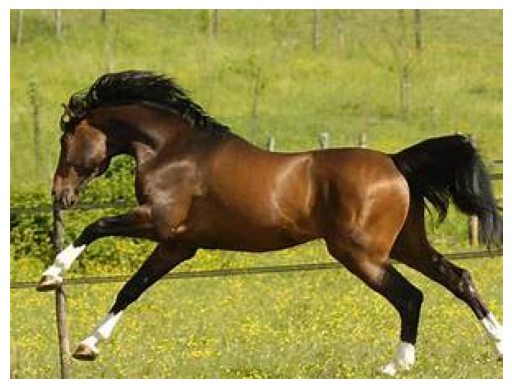

In [86]:


# Step 2: Import necessary libraries
import cv2  # or use PIL
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Step 3: Define the path to your image
# Example path: '/content/drive/MyDrive/your_folder/your_image.jpg'
image_path = '/content/drive/MyDrive/TUD/Na Li/lab6/horsek.jpeg'

# Step 4: Read the image using OpenCV
image = cv2.imread(image_path)

# Optional: Convert color from BGR to RGB (because OpenCV reads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [87]:
# print sharp your image data
print(image.shape)

(225, 300, 3)


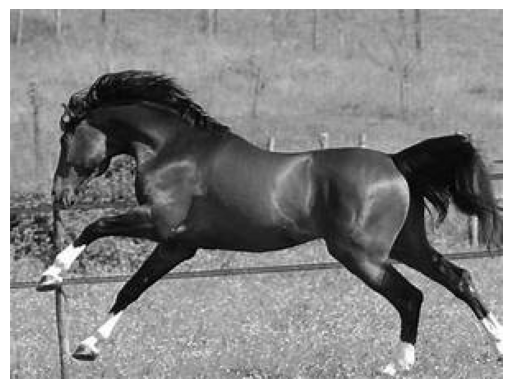

In [88]:
# Read the image normally
image = cv2.imread(image_path)

# Convert it to grayscale
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

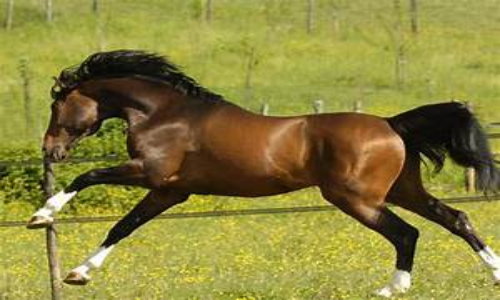

In [89]:
new_width = 500
new_height = 300
# resize your image by cv2
resized_image = cv2.resize(image, (new_width, new_height))
# show your image
cv2_imshow(resized_image)


In [90]:
print(resized_image.shape)

(300, 500, 3)


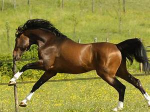

In [91]:
scale_factor = 0.5 #x and y
resized_image_scale = cv2.resize(image, (0,0), fx=scale_factor, fy=scale_factor)
cv2_imshow(resized_image_scale)

In [92]:
print(image.shape)
print(resized_image_scale.shape)
print(resized_image.shape)
print(gray_image.shape)

(225, 300, 3)
(112, 150, 3)
(300, 500, 3)
(225, 300)


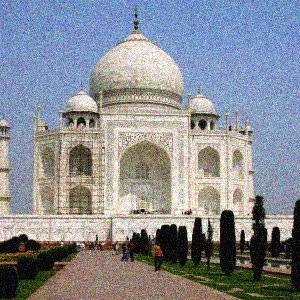

In [66]:
# Gaussion Blur image
blurred_img = cv2.imread('/content/drive/MyDrive/TUD/Na Li/lab6/taj-rgb-noise.jpg')
cv2_imshow(blurred_img)

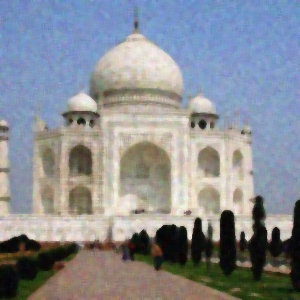

In [67]:
# median blur image
median_blurred_img = cv2.medianBlur(blurred_img, 5)
cv2_imshow(median_blurred_img)

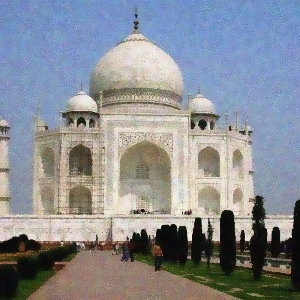

In [68]:
# Bilateral filtering image
bilateral_filter_img = cv2.bilateralFilter(blurred_img, 9, 75, 75)
cv2_imshow( bilateral_filter_img)

Notes on bilateral filtering:
d (diameter=9)	The diameter of the pixel neighborhood used for filtering.	Larger values consider more surrounding pixels, resulting in stronger smoothing.
sigmaColor=75	How much intensity differences influence the filter.	Higher values mean that pixels with larger intensity differences can still affect each other (more smoothing across colors).
sigmaSpace=75	How much spatial distance influences the filter.	Larger values mean distant pixels (within the neighborhood) are considered more strongly.

In [93]:
import numpy as np

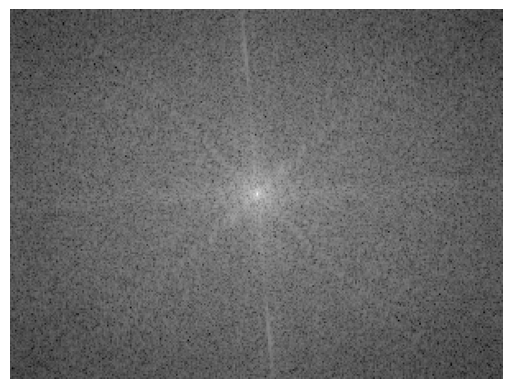

In [99]:
# Fourier Transform your image
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

Notes: np.fft.fft2()	Fourier Transform	Converts image to frequency space	Spatial → Frequency
np.fft.fftshift()	Shift zero frequency to center	Re-centers the spectrum	Frequency
np.abs() + np.log()	Magnitude spectrum	Converts to visible intensity scale	Frequency (for visualization)

In [104]:
#Create a mask for filtering (a low pass filter)
rows, cols = gray_image.shape # Use dimensions of the blurred image
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
radius = 30 #adjust radius for filter size
cv2.circle(mask, (ccol, crow), radius, 255, -1)

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

In [105]:
gray_image.shape

(225, 300)

**Notes: Concept: Frequency-Domain Filtering**

When you apply a Fourier Transform to an image, you convert it from the spatial domain (pixels) to the frequency domain.
Each point in this new domain represents a particular spatial frequency:

**Low frequencies** → smooth variations (broad shapes, gradual intensity changes)

**High frequencies** → sharp details, edges, fine textures, and noise

**A low-pass filter (LPF)** allows low frequencies to pass through but blocks (attenuates) high frequencies.
This effectively smooths or blurs the image when transformed back to spatial space.

Step-by-Step Explanation
1. rows, cols = gray_image.shape

2. Gets the dimensions of the grayscale image.

For example, if your image is 512×512 pixels:

rows = 512
cols = 512

crow, ccol = rows // 2, cols // 2

3. Finds the center coordinates of the image.

4. Since the FFT-shifted image has the low frequencies centered, we use these as the mask’s center point.

So:

crow → center row index

ccol → center column index

mask = np.zeros((rows, cols, 2), np.uint8)

5. Creates an empty (black) mask with the same spatial dimensions as the image.

**Why the third dimension is 2)?**

Because the Fourier-transformed image fshift often has two channels — one for the real part and one for the imaginary part, or when processing color/grayscale in OpenCV, it expects a 2-channel representation.

Thus, the mask is initialized with zeros (black), meaning no frequency components allowed yet.

 radius = 30

This defines the size of the circular area in the center of the mask that will allow frequencies to pass.

 Larger radius → more low frequencies kept → less blur
 Smaller radius → fewer frequencies kept → more blur / smoother image

cv2.circle(mask, (ccol, crow), radius, 255, -1)

Draws a filled white circle (-1 means filled) centered at (ccol, crow) with the specified radius.

**What this does conceptually:**

White (255) area → frequencies allowed to pass (low frequencies)

Black (0) area → frequencies blocked (high frequencies)

So, the circular region in the center corresponds to low frequencies, and everything outside (high frequencies) is zeroed out.

***Resulting Mask***

Visually:

[ Dark edges — high frequencies blocked  ]
[ Bright circle in center — low frequencies kept ]


When this mask is multiplied elementwise with the shifted Fourier transform (fshift), it:

Keeps only the low-frequency components inside the circle.

Zeros out all high-frequency components outside it.

In [106]:
#Apply the mask to the frequency domain
mask = mask[:, :, 0]
fshift_filtered =fshift*mask

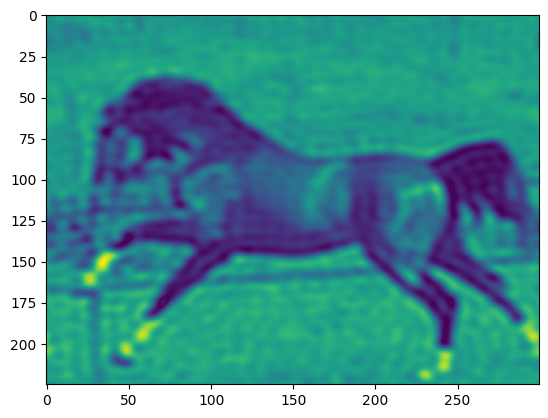

In [108]:
# Inverse shift and inverse fourier transform
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# show your back image
plt.imshow(img_back)
axiss = plt.gca()